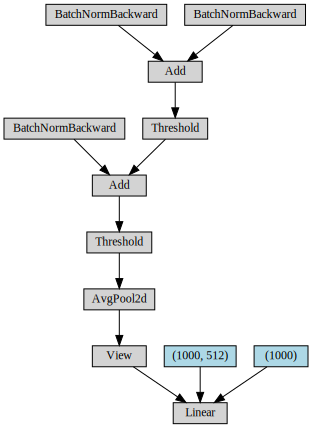

In [18]:
%matplotlib inline
from graphviz import Digraph
import re
import torch
import torch.nn.functional as F
from torch.autograd import Variable
from torch.autograd import Variable
import torchvision.models as models


def make_dot(var):
    node_attr = dict(style='filled',
                     shape='box',
                     align='left',
                     fontsize='12',
                     ranksep='0.1',
                     height='0.2')
    dot = Digraph(node_attr=node_attr, graph_attr=dict(size="12,12"))
    seen = set()

    def add_nodes(var):
        if var not in seen:
            if isinstance(var, Variable):
                value = '('+(', ').join(['%d'% v for v in var.size()])+')'
                dot.node(str(id(var)), str(value), fillcolor='lightblue')
            else:
                dot.node(str(id(var)), str(type(var).__name__))
            seen.add(var)
            if hasattr(var, 'previous_functions'):
                for u in var.previous_functions:
                    dot.edge(str(id(u[0])), str(id(var)))
                    add_nodes(u[0])
    add_nodes(var.creator)
    return dot


inputs = torch.randn(1,3,224,224)
resnet18 = models.resnet18()
y = resnet18(Variable(inputs))
print(y)

g = make_dot(y)
g

In [14]:
from __future__ import division
import cv2
import torch
from torch.autograd import Variable
import utils
import dataset
from PIL import Image

import models.crnn as crnn
#import timey
from datetime import datetime
import glob
import os
import pandas as pd



df = pd.read_csv('/home/ahmed/Pictures/cogedis/data_crnn/augmented_without_test/test_digit.csv')

#df['crnn']=None
df = df.astype(str)
#test_path='/home/ahmed/Downloads/crnn.pytorch-master/data/IIITS5K/'

test_path='/home/ahmed/Pictures/cogedis/augmented_cogedis/'
#model_path = '/home/ahmed/Downloads/crnn.pytorch-master/data/crnn.pth'
#model_path='/home/ahmed/Pictures/model/augmented_alpha_digit/netCRNN_64_65.pth'
model_path='/home/ahmed/Pictures/model/output_digit_transfer/netCRNN_24_13.pth'

#img_path = '/home/ahmed/Downloads/crnn.pytorch-master/data/demo.png'
#img_path = '/home/ahmed/Downloads/crnn.pytorch-master/data/logo.png'
#img_path = '/home/ahmed/Downloads/crnn.pytorch-master/data/ShareImg.png'
#img_path = '/home/ahmed/Downloads/crnn.pytorch-master/data/char.png'
#img_path = '/home/ahmed/Downloads/crnn.pytorch-master/data/awe.jpg'

#digits

#img_path = '/home/ahmed/Downloads/crnn.pytorch-master/data/digits3.png'

#alphabet = '0123456789abcdefghijklmnopqrstuvwxyz'
alphabet="0123456789"
#alphabet = '0123456789'

model = crnn.CRNN(32, 1, 37,256, 1).cuda()
print('loading pretrained model from %s' % model_path)


#inputs = torch.randn(1,3,224,224)
ok= model.load_state_dict(torch.load(model_path))
#y = resnet18(Variable(inputs))
print(ok)
print('hello')
#g = make_dot(ok)
#g

In [15]:
from __future__ import division
import cv2
import torch
from torch.autograd import Variable
import utils
import dataset
from PIL import Image

import models.crnn as crnn
#import timey
from datetime import datetime
import glob
import os
import pandas as pd



df = pd.read_csv('/home/ahmed/Pictures/cogedis/data_crnn/augmented_without_test/test_digit.csv')

#df['crnn']=None
df = df.astype(str)
#test_path='/home/ahmed/Downloads/crnn.pytorch-master/data/IIITS5K/'

test_path='/home/ahmed/Pictures/cogedis/augmented_cogedis/'
#model_path = '/home/ahmed/Downloads/crnn.pytorch-master/data/crnn.pth'
#model_path='/home/ahmed/Pictures/model/augmented_alpha_digit/netCRNN_64_65.pth'
model_path='/home/ahmed/Pictures/model/output_digit_transfer/netCRNN_24_13.pth'

In [17]:

from __future__ import division
import cv2
import torch
from torch.autograd import Variable
import utils
import dataset
from PIL import Image

import models.crnn as crnn
model_path='/home/ahmed/Pictures/model/output_digit_transfer/netCRNN_24_13.pth'
model = crnn.CRNN(32, 1, 37,256, 1).cuda()
print('loading pretrained model from %s' % model_path)
ok= model.load_state_dict(torch.load(model_path))

In [ ]:
CRNN (
  (cnn): Sequential (
    (conv0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu0): ReLU (inplace)
    (pooling0): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu1): ReLU (inplace)
    (pooling1): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (conv2): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (batchnorm2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True)
    (relu2): ReLU (inplace)
    (conv3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu3): ReLU (inplace)
    (pooling2): MaxPool2d (size=(2, 2), stride=(2, 1), dilation=(1, 1))
    (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (batchnorm4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True)
    (relu4): ReLU (inplace)
    (conv5): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu5): ReLU (inplace)
    (pooling3): MaxPool2d (size=(2, 2), stride=(2, 1), dilation=(1, 1))
    (conv6): Conv2d(512, 512, kernel_size=(2, 2), stride=(1, 1))
    (batchnorm6): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True)
    (relu6): ReLU (inplace)
  )
  (rnn): Sequential (
    (0): BidirectionalLSTM (
      (rnn): LSTM(512, 256, bidirectional=True)
      (embedding): Linear (512 -> 256)
    )
    (1): BidirectionalLSTM (
      (rnn): LSTM(256, 256, bidirectional=True)
      (embedding): Linear (512 -> 37)
    )
  )
)


In [ ]:
inputs = torch.randn(1,3,224,224)
resnet18 = models.resnet18()
y = resnet18(Variable(inputs))
print(y)

g = make_dot(y)
g